# **Program 6: Implement a time series analysis to predict the future popluarity of specific hashtags or keywords based on past tweet data.**

# Importing Dependencies


In [ ]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from textblob import TextBlob

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import seaborn as sns

from PIL import Image

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Social\ Media\ Analytics/Twitter-Dataset.zip

Archive:  /content/drive/MyDrive/Social Media Analytics/Twitter-Dataset.zip
  inflating: download.jpg            
  inflating: twitter_dataset.csv     


In [ ]:
df=pd.read_csv("/content/twitter_dataset.csv")

In [ ]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,Tweet_ID,Retweets,Likes
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,49.721200,49.929300
std,2886.89568,28.948856,28.877193
min,1.00000,0.000000,0.000000
25%,2500.75000,25.000000,25.000000
50%,5000.50000,49.000000,50.000000
75%,7500.25000,75.000000,75.000000
max,10000.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()

,0
Tweet_ID,0
Username,0
Text,0
Retweets,0
Likes,0
Timestamp,0


In [ ]:
df.duplicated().sum()

0

# Feature Engineering


In [ ]:
# Remove duplicate tweets
# df = df.drop_duplicates()

# Remove rows with missing values
# df = df.dropna()

# Clean tweet text by removing special characters and URLs
df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)


#  Porter Stemmer

In [ ]:

# Tokenize tweet text
df['tokens'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Stemming or Lemmatization
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])


In [ ]:
# Calculate summary statistics
mean_retweets = df['Retweets'].mean()
median_likes = df['Likes'].median()
correlation = df['Retweets'].corr(df['Likes'])


In [ ]:

# Perform sentiment analysis on tweet text
df['sentiment_polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
# Print results
print("Mean Retweets:", mean_retweets)
print("Median Likes:", median_likes)
print("Correlation between Retweets and Likes:", correlation)

Mean Retweets: 49.7212
Median Likes: 50.0
Correlation between Retweets and Likes: 0.012797546201034809


#  Histplot (Histogram Plot)


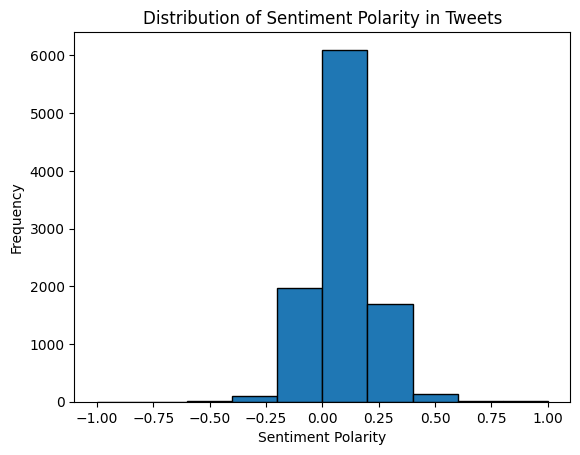

In [ ]:

# Plotting sentiment polarity distribution
plt.hist(df['sentiment_polarity'], bins=10, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Tweets')
plt.show()


In [ ]:
# Print the number of rows and columns in the dataset
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Calculate the average values of retweets and likes
avg_retweets = df['Retweets'].mean()
avg_likes = df['Likes'].mean()
print("Average Retweets:", avg_retweets)
print("Average Likes:", avg_likes)


Number of Rows: 10000
Number of Columns: 8
Average Retweets: 49.7212
Average Likes: 49.9293


In [ ]:
# Find the top users with the highest number of retweets
top_users = df.groupby('Username')['Retweets'].sum().nlargest(10)
print("Top Users by Retweets:")
print(top_users)


Top Users by Retweets:
Username
pjohnson           362
awilliams          306
fsmith             301
wmitchell          269
nbrown             267
davidsmith         263
christopher64      261
amiller            253
ehernandez         251
jessicawilliams    251
Name: Retweets, dtype: int64


#  Barplot


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


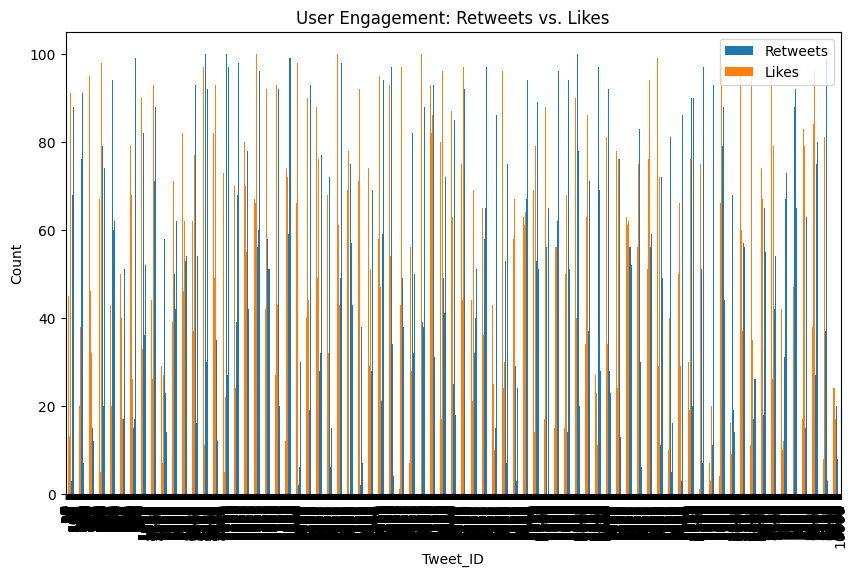

In [ ]:
# Create a bar chart of retweets and likes by username
user_engagement = df.groupby('Tweet_ID')[['Retweets', 'Likes']].sum()
user_engagement.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tweet_ID')    # username can also be taken but due to arge data Tweet_ID has used
plt.ylabel('Count')
plt.title('User Engagement: Retweets vs. Likes')
plt.legend()
plt.show()


#  Piechart


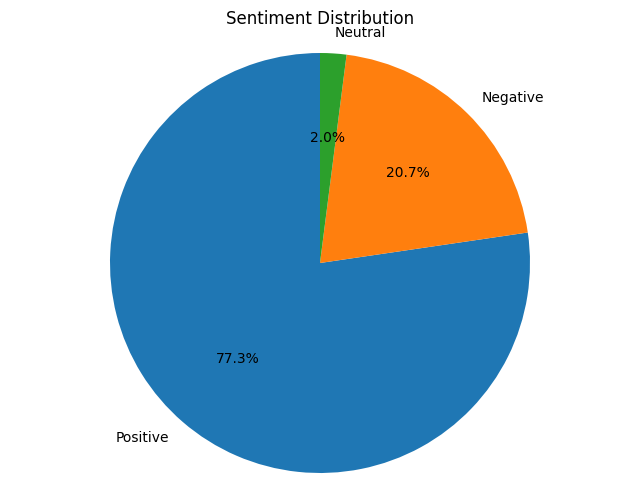

In [ ]:

# Perform sentiment analysis on tweet text
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment into positive, negative, and neutral
df['Sentiment Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Calculate the count of each sentiment category
sentiment_counts = df['Sentiment Category'].value_counts()

# Plot a pie chart of sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()


#  Count Plot


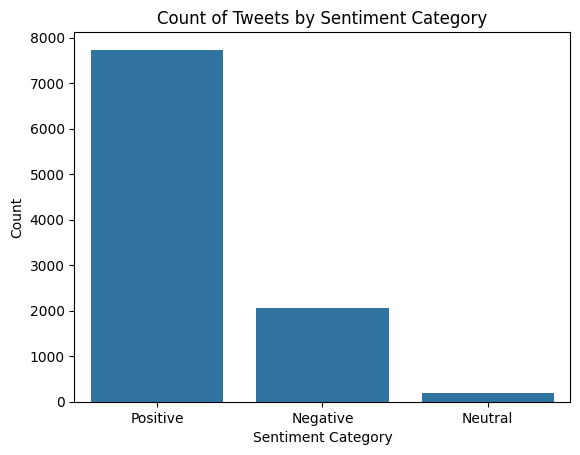

In [ ]:


# Plot the count of tweets by sentiment category
sns.countplot(x='Sentiment Category', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Count of Tweets by Sentiment Category')
plt.show()


#  Scatterplot


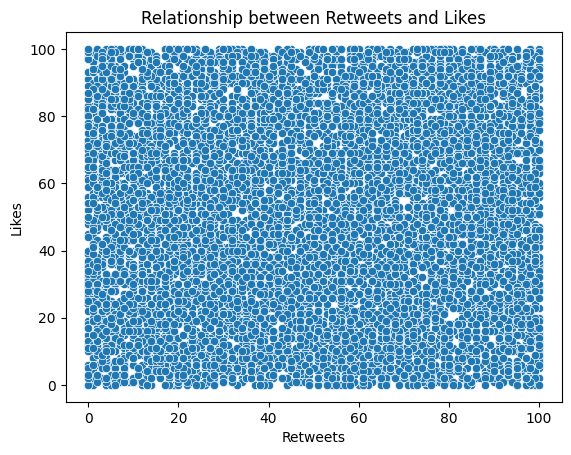

In [ ]:
# Plot the relationship between retweets and likes
sns.scatterplot(x='Retweets', y='Likes', data=df)
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.title('Relationship between Retweets and Likes')
plt.show()


#  Distplot (Distribution Plot)


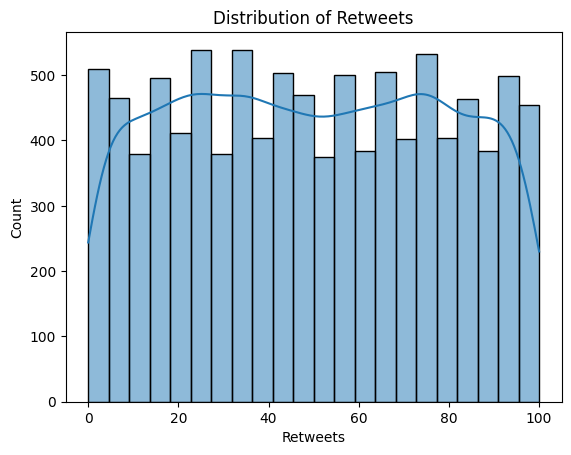

In [ ]:
# Plot the distribution of retweets
sns.histplot(df['Retweets'], kde=True)
plt.xlabel('Retweets')
plt.ylabel('Count')
plt.title('Distribution of Retweets')
plt.show()


# Boxplot


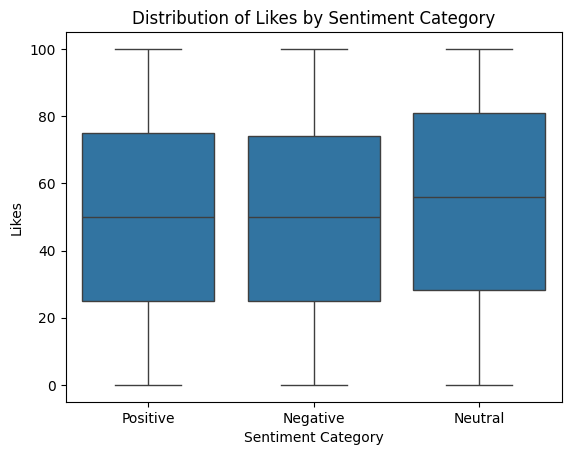

In [ ]:
# Plot the distribution of likes by sentiment category
sns.boxplot(x='Sentiment Category', y='Likes', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Likes')
plt.title('Distribution of Likes by Sentiment Category')
plt.show()


#  Heatmap


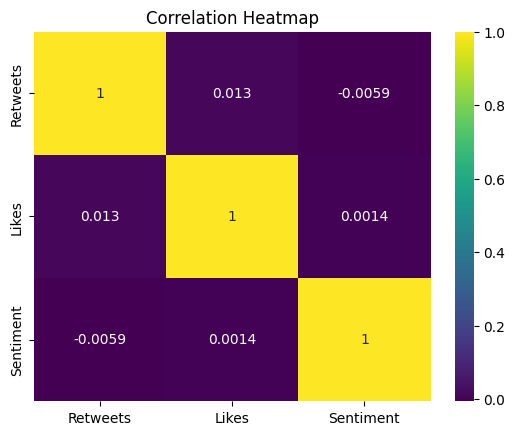

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['Retweets', 'Likes', 'Sentiment']].corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


#  WordClouds

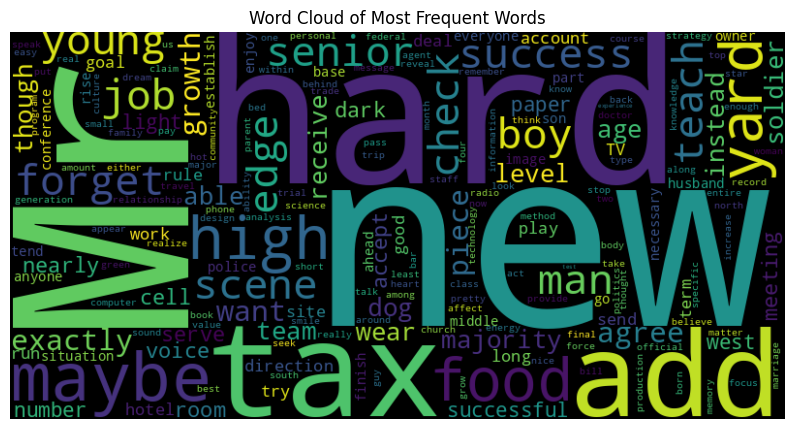

In [ ]:

# Combine all tweet texts into a single string
all_text = ' '.join(df['Text'])

# Generate a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400).generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()


#  Lineplot


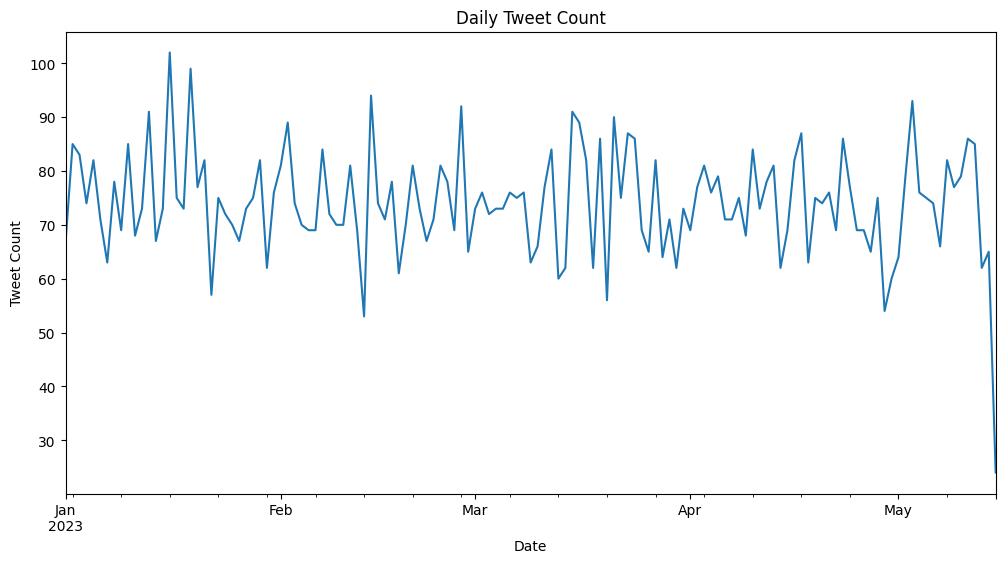

In [ ]:


# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' column as the DataFrame index
df.set_index('Timestamp', inplace=True)

# Resample the data by day and calculate the count of tweets per day
daily_tweet_count = df['Tweet_ID'].resample('D').count()

# Plot the time series of daily tweet count
plt.figure(figsize=(12, 6))
daily_tweet_count.plot()
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Count')
plt.show()


#  Barplot


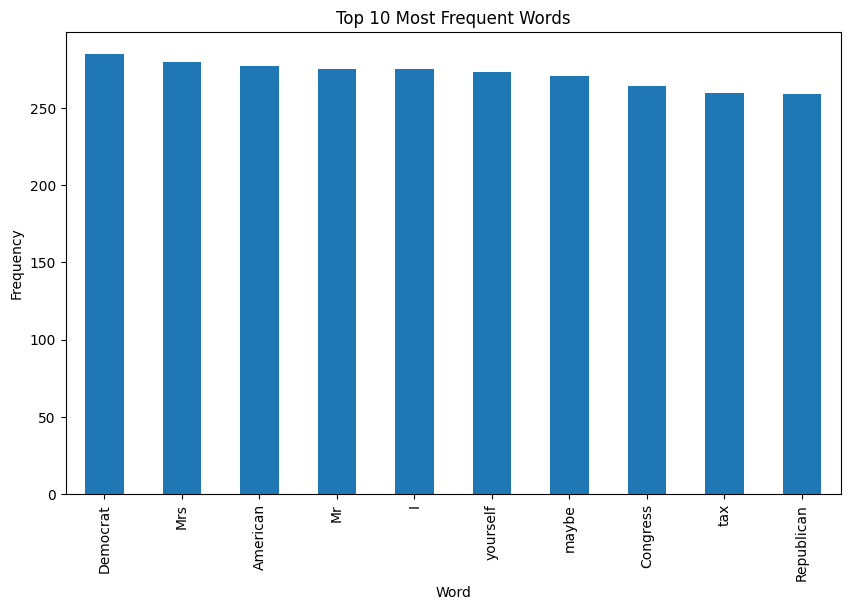

In [ ]:


# Combine all tweet texts into a single string
all_text = ' '.join(df['Text'])

# Split the text into individual words
words = all_text.split()

# Calculate the frequency of each word
word_counts = pd.Series(words).value_counts().sort_values(ascending=False)

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
word_counts.head(10).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()


# **Conclusion**

The notebook effectively showcases the use of time series analysis to predict the future popularity of specific hashtags or keywords based on historical tweet data. By combining techniques in natural language processing (NLP) and time series modeling, it provides a systematic approach to understanding trends and forecasting future occurrences of specific terms on social media.